Analisar:

musicas por popularidade

qtde de musicas por década

qtde de musicas explicitas por decada

duração media de musicas por decada

histograma de popularidade

fazer um modelo para prever a popularidade de musicas



In [ ]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
df  = pd.read_csv("/content/train.csv")
df.head()

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity
0,7pQSmQ0l7QdBeL9X6CEMbH,['Erroll Garner'],I'll Remember April - Original Edited Concert ...,1955,0.92300,0.438,257693,0.602,0,0.658000,8,0.9500,-14.565,1,1955,0.0408,122.289,0.546,24
1,2g8MTBFRUSFKbY5RQiSSEE,['Maison & Dragen'],Chinese New Year - Radio Edit,2014,0.00019,0.477,193968,0.834,0,0.978000,4,0.3960,-6.534,0,2014-05-02,0.0396,130.007,0.516,0
2,2LcJoQ5SDUZrC2qUjWMEdF,"['Yoel Lerner', 'Mazi Cohen']",השפן הקטן,1981,0.90000,0.617,56827,0.272,0,0.000000,7,0.0879,-16.818,1,1981-04-01,0.0577,83.244,0.807,38
3,6RzHyUtRNARYyn2AIuoLnY,['Barbra Streisand'],Run Wild,1980,0.29400,0.377,247467,0.269,0,0.000478,4,0.1440,-16.766,1,1980-09-23,0.0268,82.302,0.196,40
4,6Kd0I5es8911FZpYhFS053,['Willie Nelson'],Till I Gain Control Again - Live,1975,0.49400,0.501,351560,0.218,0,0.008110,0,0.2970,-13.045,1,1975,0.0283,77.854,0.239,20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129172 entries, 0 to 129171
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                129172 non-null  object 
 1   artists           129172 non-null  object 
 2   name              129172 non-null  object 
 3   year              129172 non-null  int64  
 4   acousticness      129172 non-null  float64
 5   danceability      129172 non-null  float64
 6   duration_ms       129172 non-null  int64  
 7   energy            129172 non-null  float64
 8   explicit          129172 non-null  int64  
 9   instrumentalness  129172 non-null  float64
 10  key               129172 non-null  int64  
 11  liveness          129172 non-null  float64
 12  loudness          129172 non-null  float64
 13  mode              129172 non-null  int64  
 14  release_date      129172 non-null  object 
 15  speechiness       129172 non-null  float64
 16  tempo             12

## Músicas por popularidade

In [ ]:
df.sort_values(by='popularity', ascending=False, inplace=True)
df.head(10)

,id,artists,name,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,popularity
32692,35mvY5S1H3J2QZyna3TFe0,['Ariana Grande'],positions,2020,0.4680,0.737,172325,0.802,1,0.000000,0,0.0931,-4.771,1,2020-10-30,0.0878,144.015,0.6820,96
110997,47EiUVwUp4C9fGccaPuUCS,"['Bad Bunny', 'Jhay Cortez']",DÁKITI,2020,0.4010,0.731,205090,0.573,1,0.000052,4,0.1130,-10.059,0,2020-10-30,0.0544,109.928,0.1450,95
88351,27OeeYzk6klgBh83TSvGMA,['The Kid LAROI'],WITHOUT YOU,2020,0.2130,0.662,161385,0.413,1,0.000000,0,0.1340,-7.357,1,2020-11-06,0.0299,93.005,0.4670,94
1976,2XIc1pqjXV3Cr2BQUGNBck,"['Bad Bunny', 'ROSALÍA']",LA NOCHE DE ANOCHE,2020,0.0303,0.856,203201,0.618,0,0.000000,7,0.0866,-4.892,1,2020-11-27,0.2860,81.993,0.3910,94
53562,6Im9k8u9iIzKMrmV7BWtlF,['Ariana Grande'],34+35,2020,0.2370,0.830,173711,0.585,1,0.000000,0,0.2480,-6.476,1,2020-10-30,0.0940,109.978,0.4850,94
89179,45bE4HXI0AwGZXfZtMp8JR,['Tate McRae'],you broke me first,2020,0.7860,0.642,169266,0.374,0,0.000000,4,0.0906,-9.386,1,2020-04-17,0.0545,124.099,0.0799,93
101239,4Oun2ylbjFKMPTiaSbbCih,"['Cardi B', 'Megan Thee Stallion']",WAP (feat. Megan Thee Stallion),2020,0.0194,0.935,187541,0.454,1,0.000000,1,0.0824,-7.509,1,2020-08-07,0.3750,133.073,0.3570,92
102910,31qCy5ZaophVA81wtlwLc4,['Justin Bieber'],Anyone,2021,0.1810,0.686,190779,0.538,0,0.000003,2,0.1130,-8.026,1,2021-01-01,0.0345,115.884,0.5840,92
124418,6f3Slt0GbA2bPZlz0aIFXN,['Tiësto'],The Business,2020,0.4140,0.798,164000,0.620,0,0.019200,8,0.1120,-7.079,0,2020-09-16,0.2320,120.031,0.2350,92
81792,4y4spB9m0Q6026KfkAvy9Q,"['Justin Bieber', 'benny blanco']",Lonely (with benny blanco),2020,0.8640,0.631,149297,0.239,1,0.000000,11,0.1160,-7.071,0,2020-10-16,0.0398,79.859,0.0927,92


## Quantidade de músicas por década

<Axes: xlabel='year', ylabel='Count'>

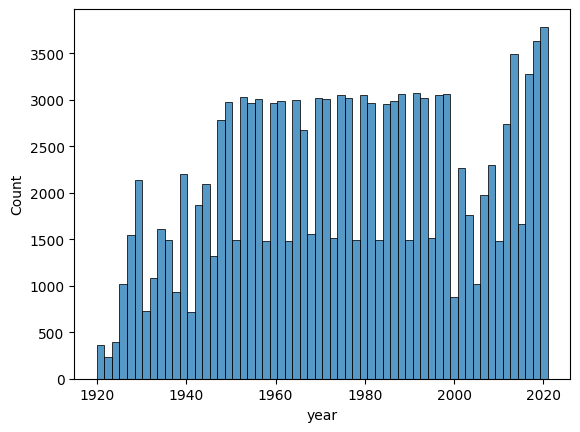

In [ ]:
sb.histplot(data = df, x='year')

In [ ]:
df['decada'] = (df['year'] // 10) * 10

musicas_decada = df['decada'].value_counts().sort_index(ascending=True)

print(musicas_decada)

decada
1920     4263
1930     8022
1940    11688
1950    14940
1960    14717
1970    15050
1980    15006
1990    15216
2000    10204
2010    16282
2020     3784
Name: count, dtype: int64


<Axes: xlabel='decada', ylabel='Count'>

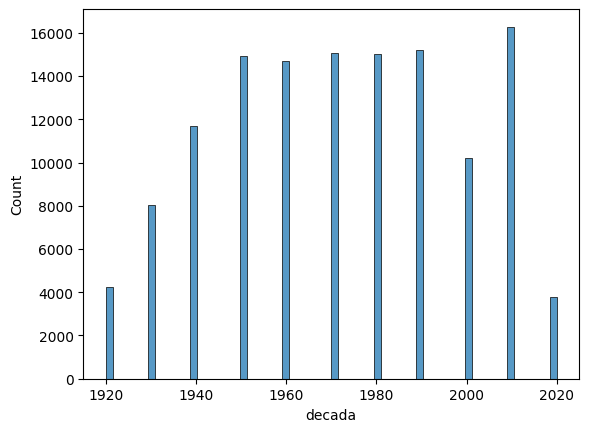

In [ ]:
sb.histplot(data = df, x='decada')


## Histograma de popularidade

<Axes: xlabel='popularity', ylabel='Count'>

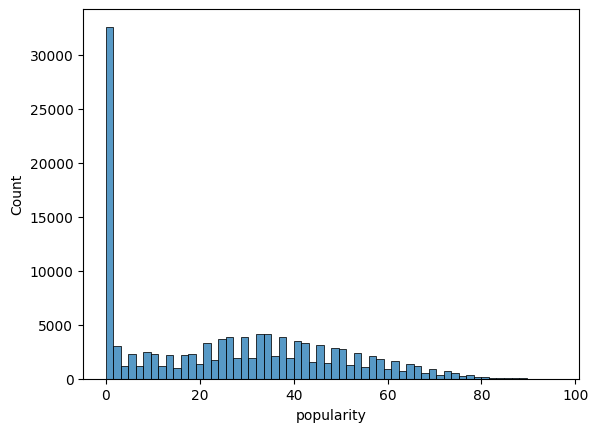

In [ ]:
sb.histplot(data = df, x='popularity')


<Axes: xlabel='popularity', ylabel='Count'>

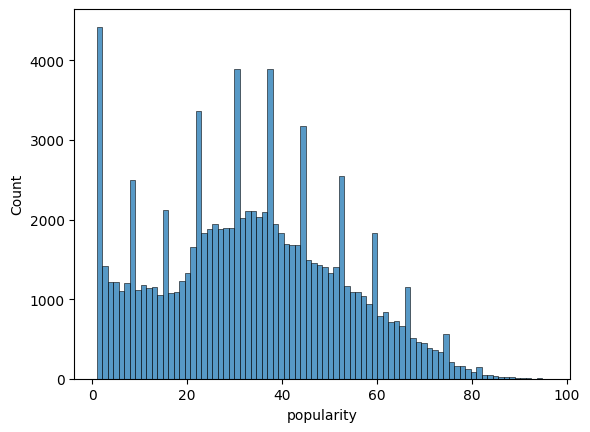

In [ ]:
sb.histplot(data = df.loc[df['popularity']>0], x='popularity')


## Músicas explícitas por década

<Axes: xlabel='decada', ylabel='Count'>

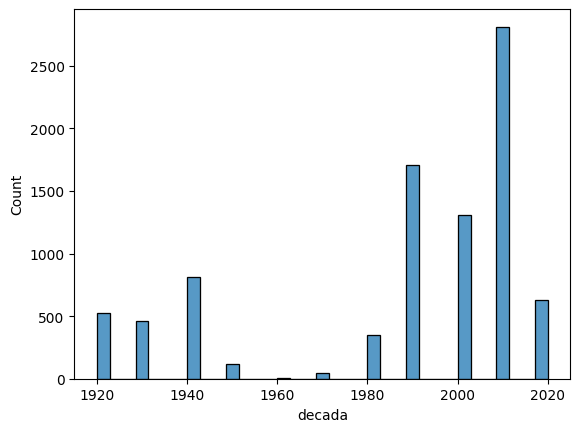

In [ ]:
sb.histplot(data = df.loc[df['explicit']==1], x='decada')

In [ ]:
pd.pivot_table(data=df, values='explicit', index='decada')

,explicit
decada,
1920,0.122449
1930,0.057716
1940,0.069559
1950,0.007697
1960,0.000408
1970,0.003189
1980,0.023457
1990,0.112447
2000,0.127793


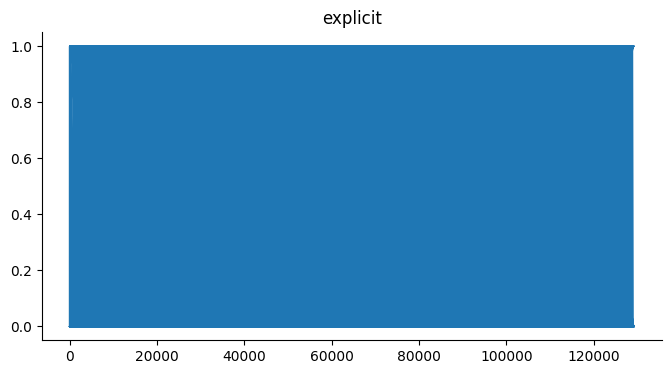

In [ ]:
df['explicit'].plot(kind='line', figsize=(8, 4), title='explicit')
plt.gca().spines[['top', 'right']].set_visible(False)

## Duração média das músicas por década

In [ ]:
df['duration_min'] = (df['duration_ms'] / 60000)

In [ ]:
pd.pivot_table(data=df, values='duration_min', index='decada')

,duration_min
decada,
1920,3.084830
1930,3.308800
1940,3.632605
1950,3.662673
1960,3.509720
1970,4.216235
1980,4.181198
1990,4.114969
2000,3.983779


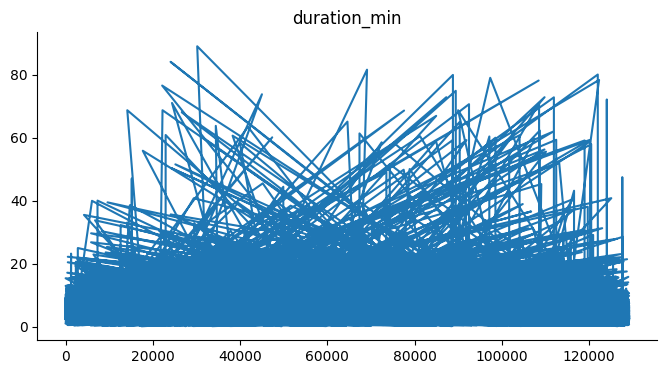

In [ ]:
df['duration_min'].plot(kind='line', figsize=(8, 4), title='duration_min')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129172 entries, 32692 to 56600
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                129172 non-null  object 
 1   artists           129172 non-null  object 
 2   name              129172 non-null  object 
 3   year              129172 non-null  int64  
 4   acousticness      129172 non-null  float64
 5   danceability      129172 non-null  float64
 6   duration_ms       129172 non-null  int64  
 7   energy            129172 non-null  float64
 8   explicit          129172 non-null  int64  
 9   instrumentalness  129172 non-null  float64
 10  key               129172 non-null  int64  
 11  liveness          129172 non-null  float64
 12  loudness          129172 non-null  float64
 13  mode              129172 non-null  int64  
 14  release_date      129172 non-null  object 
 15  speechiness       129172 non-null  float64
 16  tempo             1291

## Criação do modelo

In [ ]:
df2 = df.drop(columns=['id','artists','name','release_date'])
df2

,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity,decada,duration_min
32692,2020,0.4680,0.737,172325,0.8020,1,0.000000,0,0.0931,-4.771,1,0.0878,144.015,0.682,96,2020,2.872083
110997,2020,0.4010,0.731,205090,0.5730,1,0.000052,4,0.1130,-10.059,0,0.0544,109.928,0.145,95,2020,3.418167
88351,2020,0.2130,0.662,161385,0.4130,1,0.000000,0,0.1340,-7.357,1,0.0299,93.005,0.467,94,2020,2.689750
1976,2020,0.0303,0.856,203201,0.6180,0,0.000000,7,0.0866,-4.892,1,0.2860,81.993,0.391,94,2020,3.386683
53562,2020,0.2370,0.830,173711,0.5850,1,0.000000,0,0.2480,-6.476,1,0.0940,109.978,0.485,94,2020,2.895183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81407,1945,0.8810,0.654,183353,0.7300,0,0.000000,7,0.2730,-8.205,1,0.0449,93.892,0.965,0,1940,3.055883
104032,1939,0.9930,0.417,149653,0.4740,0,0.739000,8,0.4090,-8.832,1,0.0499,92.118,0.823,0,1930,2.494217
104031,1929,0.0796,0.714,107299,0.3290,1,0.000000,8,0.0762,-20.141,1,0.8950,127.569,0.577,0,1920,1.788317
19648,1942,0.9830,0.616,181342,0.4390,0,0.000000,5,0.2400,-12.579,1,0.0735,128.528,0.733,0,1940,3.022367


In [ ]:
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo

RandomForestRegressor(random_state=42)

In [ ]:
X = df2.drop('popularity', axis=1)
y = df2['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
modelo.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = modelo.predict(X)

In [ ]:
mse = mean_squared_error(y, y_pred)
print(f'Mean squared error: {mse}')

Mean squared error: 48.76365883000855


In [ ]:
df2['pop_predita'] = y_pred

In [ ]:
df2['erro'] = abs(df2['popularity'] - df2['pop_predita'])
df2

,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity,decada,duration_min,pop_predita,erro
32692,2020,0.4680,0.737,172325,0.8020,1,0.000000,0,0.0931,-4.771,1,0.0878,144.015,0.682,96,2020,2.872083,86.4100,9.5900
110997,2020,0.4010,0.731,205090,0.5730,1,0.000052,4,0.1130,-10.059,0,0.0544,109.928,0.145,95,2020,3.418167,86.3700,8.6300
88351,2020,0.2130,0.662,161385,0.4130,1,0.000000,0,0.1340,-7.357,1,0.0299,93.005,0.467,94,2020,2.689750,67.8000,26.2000
1976,2020,0.0303,0.856,203201,0.6180,0,0.000000,7,0.0866,-4.892,1,0.2860,81.993,0.391,94,2020,3.386683,45.2025,48.7975
53562,2020,0.2370,0.830,173711,0.5850,1,0.000000,0,0.2480,-6.476,1,0.0940,109.978,0.485,94,2020,2.895183,87.4200,6.5800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81407,1945,0.8810,0.654,183353,0.7300,0,0.000000,7,0.2730,-8.205,1,0.0449,93.892,0.965,0,1940,3.055883,0.8300,0.8300
104032,1939,0.9930,0.417,149653,0.4740,0,0.739000,8,0.4090,-8.832,1,0.0499,92.118,0.823,0,1930,2.494217,1.1500,1.1500
104031,1929,0.0796,0.714,107299,0.3290,1,0.000000,8,0.0762,-20.141,1,0.8950,127.569,0.577,0,1920,1.788317,0.0000,0.0000
19648,1942,0.9830,0.616,181342,0.4390,0,0.000000,5,0.2400,-12.579,1,0.0735,128.528,0.733,0,1940,3.022367,2.3300,2.3300


<Axes: xlabel='erro', ylabel='popularity'>

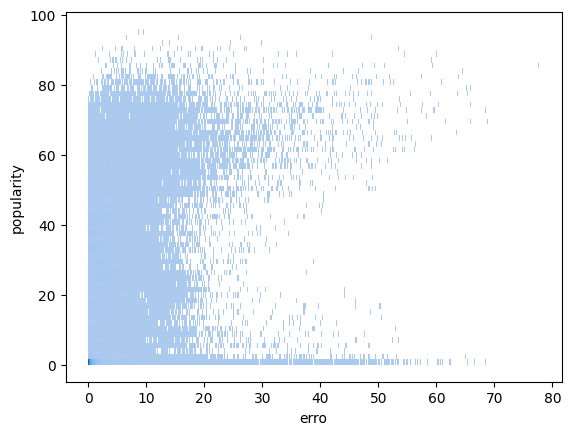

In [ ]:
sb.histplot(data=df2, x='erro',y='popularity')

In [ ]:
pd.pivot_table(data=df2, values='erro', index='popularity', aggfunc='mean')

,erro
popularity,
0,2.599648
1,3.576054
2,4.145555
3,4.536066
4,3.619754
...,...
92,20.344500
93,15.566667
94,27.192500


from matplotlib import pyplot as plt
_df_0['erro'].plot(kind='hist', bins=20, title='erro')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['erro'].plot(kind='line', figsize=(8, 4), title='erro')
plt.gca().spines[['top', 'right']].set_visible(False)

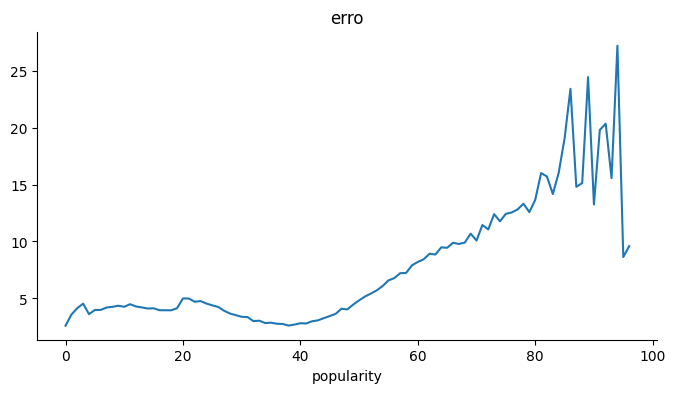

In [ ]:
from matplotlib import pyplot as plt
_df_1['erro'].plot(kind='line', figsize=(8, 4), title='erro')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df2['Binpop'] = pd.cut(df['popularity'], 10, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [ ]:
pd.pivot_table(data=df2, values='erro', index='Binpop', aggfunc='mean')

,erro
Binpop,
1,3.033918
2,4.155370
3,4.435353
4,3.010522
5,3.244640
6,5.711144
7,8.687103
8,11.143029
9,14.180757


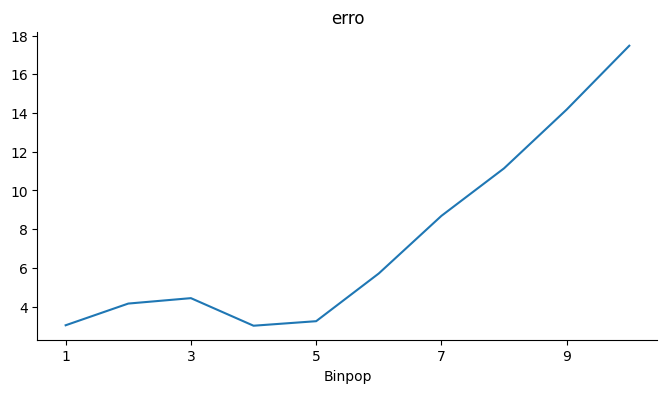

In [ ]:
from matplotlib import pyplot as plt
_df_3['erro'].plot(kind='line', figsize=(8, 4), title='erro')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
X = df2.drop(['Binpop', 'popularity'], axis=1)
y = df2['Binpop']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
modelo.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = modelo.predict(X)

In [ ]:
mse = mean_squared_error(y, y_pred)
print(f'Mean squared error: {mse}')

Mean squared error: 0.056141882141640606


In [ ]:
df2['pop_predita'] = y_pred

In [ ]:
df2['Binpop'] = df2['Binpop'].astype(float)
df2['erro'] = abs(df2['Binpop'] - df2['pop_predita'])
df2

,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,popularity,decada,duration_min,pop_predita,erro,Binpop
32692,2020,0.4680,0.737,172325,0.8020,1,0.000000,0,0.0931,-4.771,1,0.0878,144.015,0.682,96,2020,2.872083,9.88,0.12,10.0
110997,2020,0.4010,0.731,205090,0.5730,1,0.000052,4,0.1130,-10.059,0,0.0544,109.928,0.145,95,2020,3.418167,9.99,0.01,10.0
88351,2020,0.2130,0.662,161385,0.4130,1,0.000000,0,0.1340,-7.357,1,0.0299,93.005,0.467,94,2020,2.689750,9.97,0.03,10.0
1976,2020,0.0303,0.856,203201,0.6180,0,0.000000,7,0.0866,-4.892,1,0.2860,81.993,0.391,94,2020,3.386683,6.98,3.02,10.0
53562,2020,0.2370,0.830,173711,0.5850,1,0.000000,0,0.2480,-6.476,1,0.0940,109.978,0.485,94,2020,2.895183,9.98,0.02,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81407,1945,0.8810,0.654,183353,0.7300,0,0.000000,7,0.2730,-8.205,1,0.0449,93.892,0.965,0,1940,3.055883,1.00,0.00,1.0
104032,1939,0.9930,0.417,149653,0.4740,0,0.739000,8,0.4090,-8.832,1,0.0499,92.118,0.823,0,1930,2.494217,1.00,0.00,1.0
104031,1929,0.0796,0.714,107299,0.3290,1,0.000000,8,0.0762,-20.141,1,0.8950,127.569,0.577,0,1920,1.788317,1.00,0.00,1.0
19648,1942,0.9830,0.616,181342,0.4390,0,0.000000,5,0.2400,-12.579,1,0.0735,128.528,0.733,0,1940,3.022367,1.00,0.00,1.0


In [ ]:
pd.pivot_table(data=df2, values='erro', index='Binpop', aggfunc='mean')

,erro
Binpop,
1.0,0.024480
2.0,0.100446
3.0,0.100931
4.0,0.083771
5.0,0.110164
6.0,0.128952
7.0,0.107923
8.0,0.124563
9.0,0.204354


from matplotlib import pyplot as plt
_df_4['erro'].plot(kind='hist', bins=20, title='erro')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['erro'].plot(kind='line', figsize=(8, 4), title='erro')
plt.gca().spines[['top', 'right']].set_visible(False)

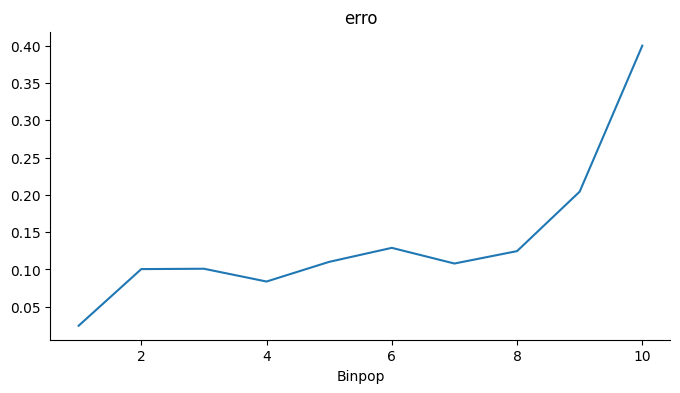

In [ ]:
from matplotlib import pyplot as plt
_df_5['erro'].plot(kind='line', figsize=(8, 4), title='erro')
plt.gca().spines[['top', 'right']].set_visible(False)